<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

This library provides the functions necessary to import and process xAPI statements, whether they are provided as ```JSON``` or ```csv``` files.

The [documentation](https://stocastico.github.io/xapi_analysis/) of the library provides tests and examples for the function, and it can be used as the starting point for analysing xAPI statements datasets.

## Install

```sh
pip install git+https://github.com/stocastico/xapi_analysis.git
```

## How to use

After installing, import the modules in your Python code using the following calls

In [ ]:
from xapi_analysis.input_json import *
from xapi_analysis.input_csv import *

And from there you can use all the functions defined there.

### Example

As an example, let's just open a toy dataset of xAPI statements and run some functions on it

In [ ]:
csv_file = '../example_statements_4.csv'
statements = import_csv(csv_file, index_col=0, delimiter=',')
statements.head(5)

,timestamp,stored,actor,verb,object,result
0,2023-03-10 11:45:09.638000+00:00,2023-03-10T11:45:09.638Z,Teacher,Logged In,Salesianos,NaN
1,2023-03-10 11:52:00.020000+00:00,2023-03-10T11:52:00.020Z,PC006,Logged In,Salesianos,NaN
2,2023-03-10 11:52:04.063000+00:00,2023-03-10T11:52:04.063Z,PC008,Logged In,Salesianos,NaN
3,2023-03-10 11:52:05.177000+00:00,2023-03-10T11:52:05.177Z,Tablet1,Logged In,Salesianos,"{""score"":{""raw"":0}}"
4,2023-03-10 11:52:05.679000+00:00,2023-03-10T11:52:05.679Z,PC004,Logged In,Salesianos,NaN


Process and filter the data:

In [ ]:
statements = remove_whitespaces(statements, ["actor"])
statements = to_lowercase(statements, ["actor"])
statements = remove_verbs(statements, ["Logged In", "Logged Out"])
statements = remove_actors(statements, ["android3"])
statements.head(5)

,timestamp,stored,actor,verb,object,result
14,2023-03-10 11:52:18.277000+00:00,2023-03-10T11:52:18.277Z,iphone1,Placed,Earth,"{""score"":{""raw"":0}}"
15,2023-03-10 11:52:18.847000+00:00,2023-03-10T11:52:18.847Z,iphone1,Swiped,Left,"{""score"":{""raw"":0}}"
18,2023-03-10 11:52:29.001000+00:00,2023-03-10T11:52:29.001Z,iphone1,Placed,Earth,"{""score"":{""raw"":0}}"
19,2023-03-10 11:52:29.094000+00:00,2023-03-10T11:52:29.094Z,android2,Placed,Earth,"{""score"":{""raw"":0}}"
20,2023-03-10 11:52:29.194000+00:00,2023-03-10T11:52:29.194Z,iphone1,Swiped,Right,"{""score"":{""raw"":0}}"


Count the number of statements sent by each actor

In [ ]:
interactions =  count_interactions(statements)
interactions

,actor,count
0,pc009,6
1,pc006,13
2,pc008,19
3,pc002,21
4,pc004,32
5,pc007,42
6,pc003,43
7,iphone1,86
8,ipad1,87
9,android4,106


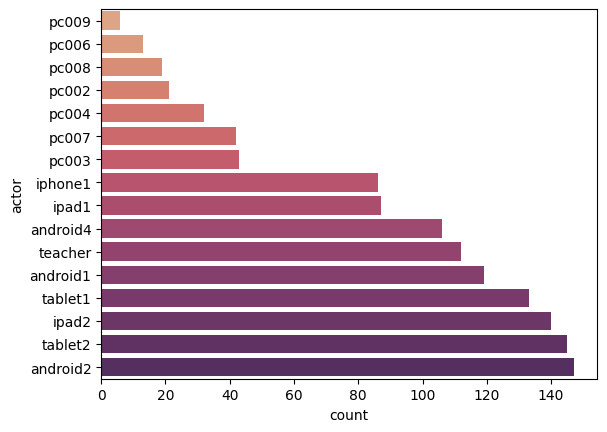

In [ ]:
create_barplot(interactions, 'count', 'actor', cmap='flare')